In [ ]:
# Import nescessary Libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

In [98]:
#Import data sets

train = pd.read_csv(r'C:\Users\PC\Downloads\titanic\train.csv')
test = pd.read_csv(r'C:\Users\PC\Downloads\titanic\test.csv')


In [99]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [100]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [101]:
# dettach Target from training set and save it for later before cmbining

survived = train['Survived']
train.drop('Survived', axis= 1, inplace= True)
train.shape

(891, 11)

In [102]:
# Adding identifier Before Combining dataframes
train['source']= 'train'
test['source'] = 'test'

In [103]:
# Bringing data to single df
combined_df = pd.concat([train, test]).reset_index(drop=True)

In [104]:
display(combined_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [105]:
# Check for Null Entries
combined_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

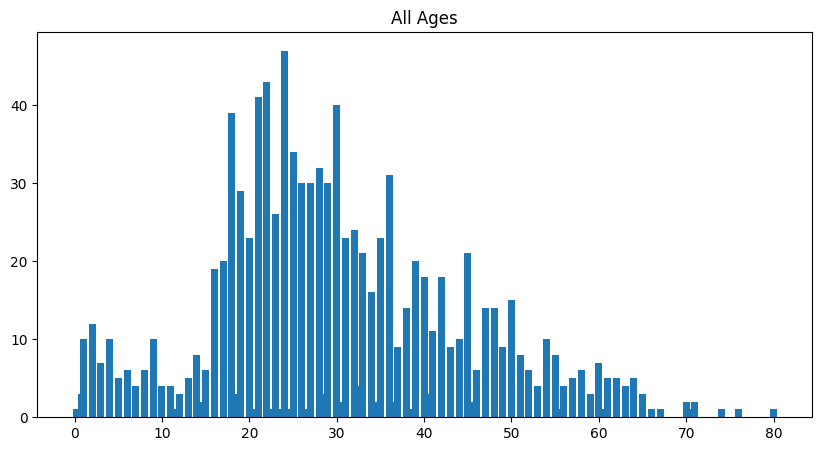

In [106]:
# Distribution All Ages

y = combined_df['Age'].value_counts()
x = y.index.values

plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.title('All Ages')
plt.show()

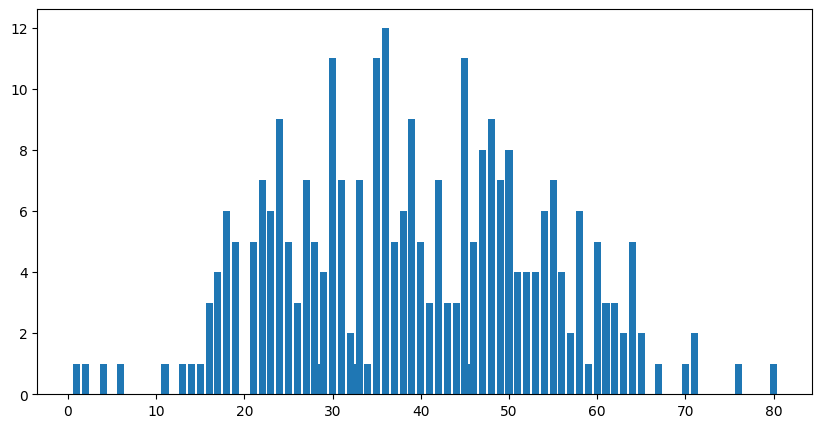

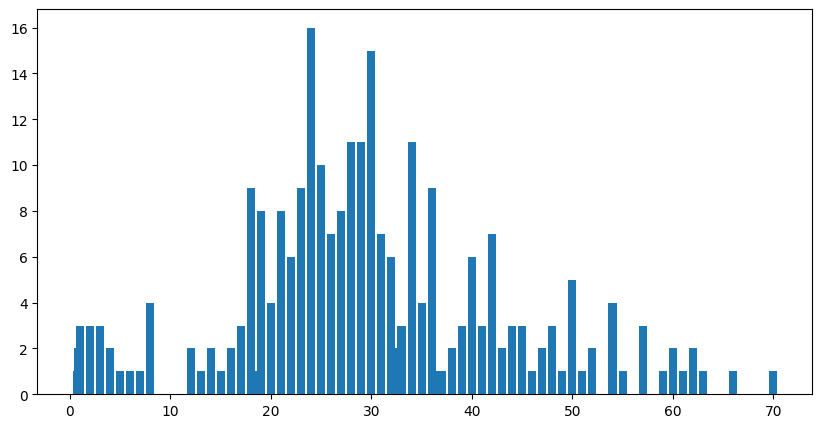

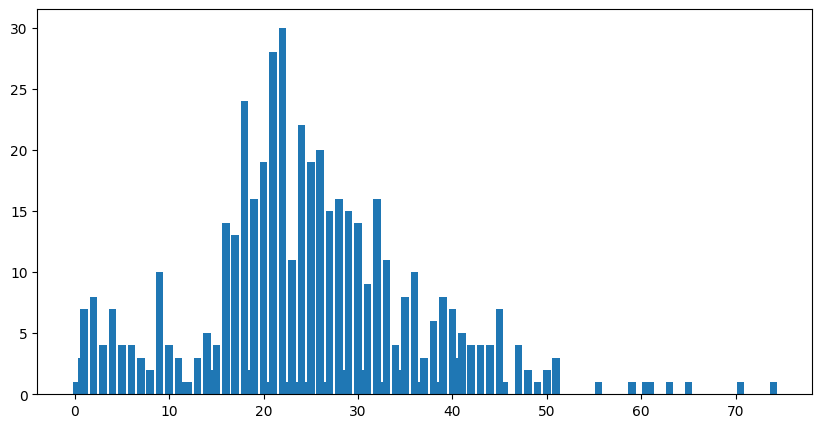

In [107]:
# Distribution of Ages per class
classes_age = combined_df[['Pclass', 'Age']]
for i in range(1,4):
    y= classes_age[classes_age['Pclass']==i]['Age'].value_counts()
    x= y.index.values
    plt.figure(figsize=(10,5))
    plt.bar(x,y)


In [108]:
# Median Age per Class
print(f'Pclass Median:\n{round(classes_age.groupby(by='Pclass').mean())}')
medians= classes_age.groupby(by='Pclass').median()

Pclass Median:
         Age
Pclass      
1       39.0
2       30.0
3       25.0


In [109]:
medians.shape

(3, 1)

In [110]:
# Fitting null ages with median age for each Pclass

for i in range(1, 4):
    
    combined_df.loc[(combined_df['Pclass']==i)  & (combined_df['Age'].isnull()), 'Age'] = medians.loc[i, 'Age']

In [111]:
combined_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S,test


In [112]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  source       1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [113]:
combined_df[combined_df['Cabin'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
5,6,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,train
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,test
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S,test
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S,test


In [114]:
# Filling missing value in Cabin with 'M'

combined_df['Cabin'].fillna('M', inplace=True)
combined_df['Cabin']= combined_df['Cabin'].str[0]
combined_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,test
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,test
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,test
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,test


In [115]:
# Checking Null Values again 
combined_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       2
source         0
dtype: int64

In [116]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# the row where Fare is missing has p class = 3 and Embarked= 'S'

combined_df[combined_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,M,S,test


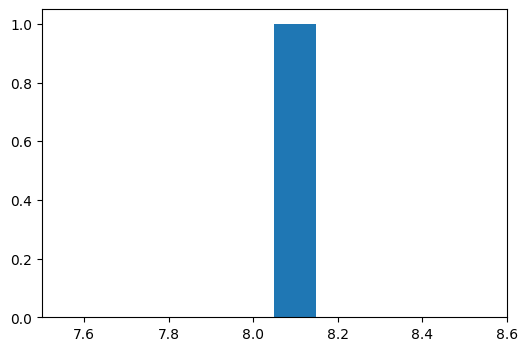

8.05


In [ ]:
# The one missing row of Fare can be filled with median of fare where Pclass= 3 and Embarked = 'S'

median_fare= combined_df.loc[(combined_df['Embarked']=='S') & (combined_df['Pclass']==3), 'Fare'].median()

plt.figure(figsize=(6,4))
plt.hist(median_fare, )
plt.show()
print(median_fare)

In [135]:
# filling the Fare null
combined_df['Fare'].fillna(median_fare, inplace=True)

In [136]:
combined_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
source         0
dtype: int64

In [137]:
# Checking where embarked is null 

combined_df[combined_df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,train
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,train


In [ ]:
# there is two rows missing in Embarked. Both beolongs to Pclass= 1 And Fare is 80 for  both
# Checking for similar embarked

sim_emb = combined_df[(combined_df['Fare']>= 70) & (combined_df['Fare']<= 90) & (combined_df['Pclass']== 1)]['Embarked']
print(sim_emb.value_counts())

Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


In [ ]:
# Filling Embarked null with most likely value which is C

combined_df['Embarked'].fillna('C', inplace=True)
combined_df['Embarked'].isnull().sum()

np.int64(0)

In [146]:
# Binning Titles


print(combined_df['Name'].unique())
names= combined_df['Name']
last_names = []
titles = []
first_names = []

for name in names: 
    if ', ' not in name:
        last_names.append('')
    else:
        last, name = name.split(', ', 1)
        last_names.append(last)

    if '. ' not in name:
        titles.append('')
    else:
        title, first = name.split('. ', 1)
        titles.append(title)
        first_names.append(first)

last_names= np.array(last_names)
titles= np.array(titles)
first_names= np.array(first_names)  


idx= np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx]= 'Millitary'

idx = np.where(np.isin(titles, ['Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx]= 'Nobility'

idx = np.where(np.isin(titles, ['Miss', 'Mlle', 'Ms']))
titles[idx]= 'Ms'

idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx]= 'Mrs'


print('\n')
print(np.unique(titles, return_counts=True))

combined_df['Title'] = titles

combined_df.Title.unique()

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']


(array(['Millitary', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'], dtype='<U12'), array([  7, 757, 198, 264,  75,   8]))


array(['Mr', 'Mrs', 'Ms', 'Nobility', 'Rev', 'Millitary'], dtype=object)

In [147]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  source       1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 133.1+ KB


In [ ]:
# Binning Age column
print(combined_df.Age.min(), combined_df.Age.max())

bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])

combined_df['Age_bin'] = pd.cut(combined_df['Age'], bins)
combined_df


0.17 80.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Title,Age_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,train,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,train,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,train,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,train,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,train,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,test,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,test,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,test,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,test,Mr,"(20, 30]"


In [150]:
# Adding a New Column for Ticket Counts for each ticket id

ticket_dict = dict(combined_df['Ticket'].value_counts())
combined_df['tkt_count'] = combined_df['Ticket'].map(ticket_dict)

{'CA. 2343': np.int64(11), '1601': np.int64(8), 'CA 2144': np.int64(8), '347082': np.int64(7), 'S.O.C. 14879': np.int64(7), '3101295': np.int64(7), 'PC 17608': np.int64(7), '347077': np.int64(7), '382652': np.int64(6), '113781': np.int64(6), '19950': np.int64(6), '347088': np.int64(6), 'W./C. 6608': np.int64(5), '349909': np.int64(5), '220845': np.int64(5), '4133': np.int64(5), '16966': np.int64(5), 'PC 17757': np.int64(5), '113503': np.int64(5), 'C.A. 34651': np.int64(4), 'SC/Paris 2123': np.int64(4), '24160': np.int64(4), 'C.A. 2315': np.int64(4), 'W./C. 6607': np.int64(4), '36928': np.int64(4), '12749': np.int64(4), '230136': np.int64(4), '2666': np.int64(4), 'PC 17483': np.int64(4), 'C.A. 33112': np.int64(4), '17421': np.int64(4), '113760': np.int64(4), 'PC 17760': np.int64(4), 'PC 17755': np.int64(4), 'LINE': np.int64(4), '345773': np.int64(3), 'A/4 48871': np.int64(3), '315153': np.int64(3), '28220': np.int64(3), 'PC 17761': np.int64(3), '371110': np.int64(3), '29103': np.int64(3

In [151]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  source       1309 non-null   object 
 12  Title        1309 non-null   object 
 13  tkt_count    1309 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 143.3+ KB


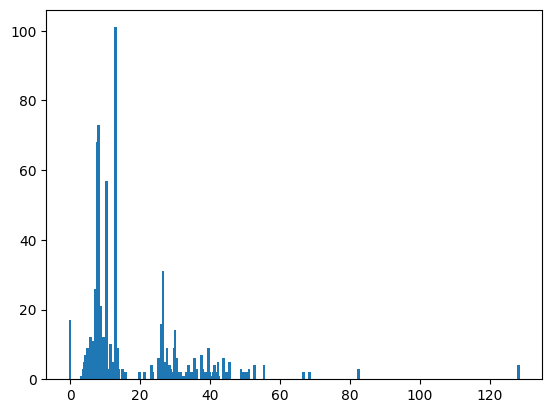

0.0 128.0823


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Title,tkt_count,Fare_per_ticket,Fare_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,train,Mr,1,7.250000,"(-0.001, 10.0]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,train,Mrs,2,35.641650,"(30.0, 40.0]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,train,Ms,1,7.925000,"(-0.001, 10.0]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,train,Mrs,2,26.550000,"(20.0, 30.0]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,train,Mr,1,8.050000,"(-0.001, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,test,Mr,1,8.050000,"(-0.001, 10.0]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,test,Nobility,3,36.300000,"(30.0, 40.0]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,test,Mr,1,7.250000,"(-0.001, 10.0]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,test,Mr,1,8.050000,"(-0.001, 10.0]"


In [ ]:
# Adding another column for Fare per ticket

combined_df['Fare_per_ticket'] = combined_df['Fare']/ combined_df['tkt_count']
combined_df['Fare_per_ticket']

# Converting Unique values to numpy array for easier computations

plt.bar(combined_df['Fare_per_ticket'].value_counts().index.values,combined_df['Fare_per_ticket'].value_counts())
plt.show()


# Creating Fare_bin for the Fare_per_ticket

bins = [0,10,20,30,40,50,60,70,80, combined_df['Fare_per_ticket'].max() + 1]
combined_df['Fare_bin'] = pd.cut(combined_df['Fare_per_ticket'], bins, include_lowest=True)

print(combined_df['Fare_per_ticket'].min(), combined_df['Fare_per_ticket'].max())
display(combined_df)


In [155]:
# Add Column for whole family count including the buyer

combined_df['Num_Family'] = combined_df['SibSp'] + combined_df['Parch'] + 1
combined_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Title,tkt_count,Fare_per_ticket,Fare_bin,Num_Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,train,Mr,1,7.250000,"(-0.001, 10.0]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,train,Mrs,2,35.641650,"(30.0, 40.0]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,train,Ms,1,7.925000,"(-0.001, 10.0]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,train,Mrs,2,26.550000,"(20.0, 30.0]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,train,Mr,1,8.050000,"(-0.001, 10.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,test,Mr,1,8.050000,"(-0.001, 10.0]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,test,Nobility,3,36.300000,"(30.0, 40.0]",1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,test,Mr,1,7.250000,"(-0.001, 10.0]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,test,Mr,1,8.050000,"(-0.001, 10.0]",1


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      1309 non-null   int64   
 1   Pclass           1309 non-null   int64   
 2   Name             1309 non-null   object  
 3   Sex              1309 non-null   object  
 4   Age              1309 non-null   float64 
 5   SibSp            1309 non-null   int64   
 6   Parch            1309 non-null   int64   
 7   Ticket           1309 non-null   object  
 8   Fare             1309 non-null   float64 
 9   Cabin            1309 non-null   object  
 10  Embarked         1309 non-null   object  
 11  source           1309 non-null   object  
 12  Title            1309 non-null   object  
 13  Age_bin          1309 non-null   category
 14  tkt_count        1309 non-null   int64   
 15  Fare_per_ticket  1309 non-null   float64 
 16  Fare_bin         1309 non-null   category


In [157]:
# Dropping the unnescessary columns 

combined_df.drop(['tkt_count', 'Name', 'Age', 'Fare', 'Ticket', 'Fare_per_ticket'], axis= 1, inplace= True)

In [158]:
# set panssengerId col as the index col of the df

combined_df.set_index('PassengerId', inplace= True) 

In [159]:
combined_df.nunique()

Pclass        3
Sex           2
SibSp         7
Parch         8
Cabin         9
Embarked      3
source        2
Title         6
Fare_bin      8
Num_Family    9
dtype: int64

## Model Evaluation

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [162]:
LabelEncoder()
encoder_df = combined_df.copy()
encoder_df= encoder_df.astype(str)

In [163]:
encoder_df= encoder_df.apply(LabelEncoder().fit_transform)

In [164]:
encoder_df

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,source,Title,Fare_bin,Num_Family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,1,1,0,2
2,0,0,1,0,2,0,1,2,3,2
3,2,0,0,0,7,2,1,3,0,0
4,0,0,1,0,2,2,1,2,2,2
5,2,1,0,0,7,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,0,1,0,0
1306,0,0,0,0,2,0,0,4,3,0
1307,2,1,0,0,7,2,0,1,0,0


In [165]:
from sklearn.preprocessing import OneHotEncoder

one_hot_df = encoder_df.copy()
one_hot_df = pd.get_dummies(one_hot_df, columns = ['Sex', 'Title', 'Embarked'])

In [166]:
one_hot_df

,Pclass,SibSp,Parch,Cabin,source,Fare_bin,Num_Family,Sex_0,Sex_1,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,,,,,,,
1,2,1,0,7,1,0,2,False,True,False,True,False,False,False,False,False,False,True
2,0,1,0,2,1,3,2,True,False,False,False,True,False,False,False,True,False,False
3,2,0,0,7,1,0,0,True,False,False,False,False,True,False,False,False,False,True
4,0,1,0,2,1,2,2,True,False,False,False,True,False,False,False,False,False,True
5,2,0,0,7,1,0,0,False,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,0,0,0,False,True,False,True,False,False,False,False,False,False,True
1306,0,0,0,2,0,3,0,True,False,False,False,False,False,True,False,True,False,False
1307,2,0,0,7,0,0,0,False,True,False,True,False,False,False,False,False,False,True


In [ ]:
# Converting Bool Cols back to integer
bool_cols = one_hot_df.select_dtypes('bool').columns
one_hot_df[bool_cols] = one_hot_df[bool_cols].astype('int64')


In [ ]:
# Saperating the df back to train and test sets using Source identifier column

train_df = one_hot_df[one_hot_df['source'] == 1].reset_index(drop=True)
test_df = one_hot_df[one_hot_df['source'] == 0].reset_index(drop=True)

In [172]:
# Drop the Source identifier column as the purpose is alredy serverd

test_df.drop(columns= 'source',inplace=True)
train_df.drop(columns= 'source', inplace=True)

print(train_df.columns.tolist())
print(test_df.columns.tolist())

['Pclass', 'SibSp', 'Parch', 'Cabin', 'Fare_bin', 'Num_Family', 'Sex_0', 'Sex_1', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Survived']
['Pclass', 'SibSp', 'Parch', 'Cabin', 'Fare_bin', 'Num_Family', 'Sex_0', 'Sex_1', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Embarked_0', 'Embarked_1', 'Embarked_2']


In [169]:
# Adding the Traget column back to the Training set

train_df['Survived'] = survived

In [ ]:

X = train_df
y= train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state = 0)


In [76]:

print( X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(623, 19) (623,) (268, 19) (268,)


In [ ]:
# RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [65]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test, y_pred)
acc

1.0

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[168,   0],
       [  0, 100]])

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.0
R²: 1.0


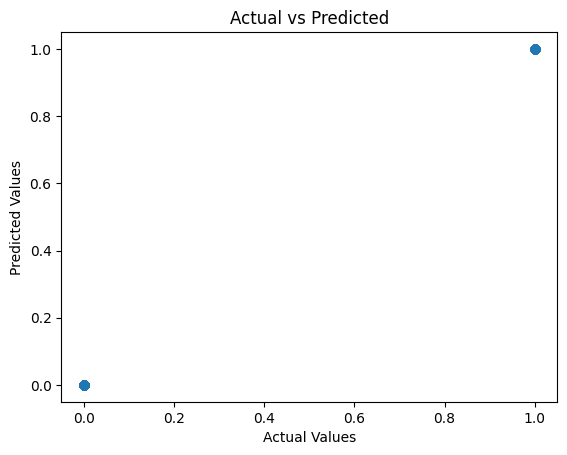

In [67]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


In [ ]:
# LogisticRegression 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV score:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV score: 1.0


<Axes: >

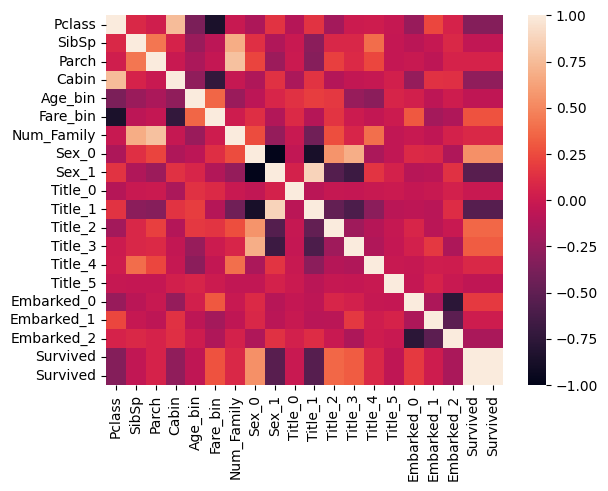

In [173]:
import pandas as pd

# Assuming X_train is a DataFrame and y_train is a Series
df = pd.concat([X_train, y_train], axis=1)
sns.heatmap(df.corr())
